Problem Statement -
"LaptopLens: Interactive Dashboard for Laptop Price & Performance Analysis"

With the rapid growth of the laptop market, consumers often find it challenging to select the right laptop that balances price, performance, and usability. Given the variety of brands, processors, GPUs, and specifications available, making informed decisions requires analyzing multiple parameters simultaneously.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving laptop_prices.csv to laptop_prices.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/laptop_prices.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [5]:
print("Missing Values")
df.isnull().sum()

Missing Values


,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [6]:
# check for duplicates rows
df.duplicated().sum()

np.int64(0)

In [7]:
print("Unique values:\n")
df.nunique()

Unique values:



,0
Brand,10
Processor,8
RAM (GB),5
Storage,5
GPU,7
Screen Size (inch),5
Resolution,4
Battery Life (hours),81
Weight (kg),231
Operating System,4


In [8]:
print("Summary statistics:\n")
df.describe()

Summary statistics:



,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [13]:
# correlation
correlation = df.corr(numeric_only = True)
print(correlation)

                      RAM (GB)  Screen Size (inch)  Battery Life (hours)  \
RAM (GB)              1.000000            0.007915              0.012470   
Screen Size (inch)    0.007915            1.000000              0.008348   
Battery Life (hours)  0.012470            0.008348              1.000000   
Weight (kg)          -0.001716           -0.015508             -0.001774   
Price ($)             0.616221            0.069829              0.009778   

                      Weight (kg)  Price ($)  
RAM (GB)                -0.001716   0.616221  
Screen Size (inch)      -0.015508   0.069829  
Battery Life (hours)    -0.001774   0.009778  
Weight (kg)              1.000000   0.002431  
Price ($)                0.002431   1.000000  


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

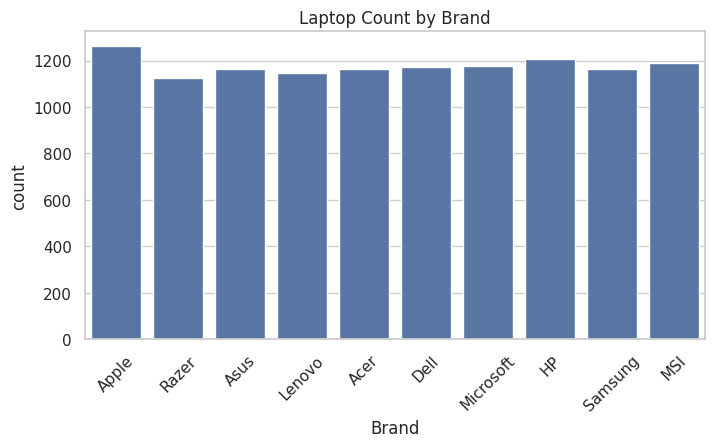

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Brand')
plt.title("Laptop Count by Brand")
plt.xticks(rotation=45)
plt.show()

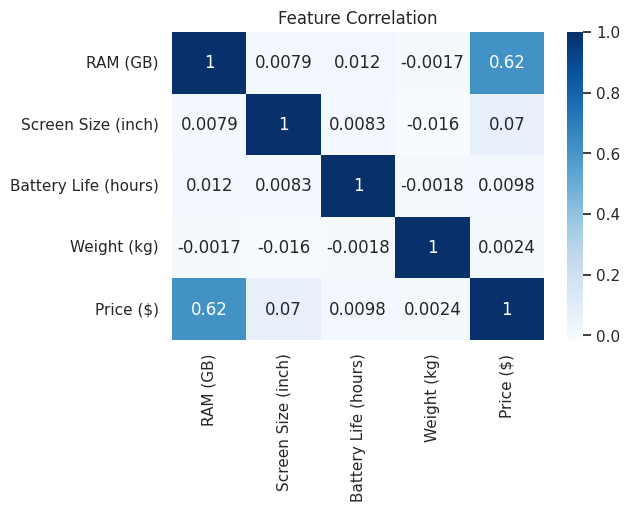

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Feature Correlation")
plt.show()

In [19]:
import sqlite3

In [32]:
conn = sqlite3.connect("laptoplens.db")
cursor = conn.cursor()

In [33]:
df.to_sql("laptoplens", conn, if_exists="replace", index=False)


11768

In [36]:
# Top Brands with Highest Average Price
query = """
SELECT Brand, ROUND(AVG("Price ($)"), 2) AS Avg_Price
FROM laptoplens
GROUP BY Brand
ORDER BY Avg_Price DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
result

,Brand,Avg_Price
0,Apple,2915.36
1,Razer,2695.21
2,MSI,2517.55
3,Lenovo,1978.47
4,Microsoft,1975.20


In [37]:
# Laptops Offering Best RAM per Dollar
query = """
SELECT *, ROUND("RAM (GB)" / "Price ($)", 4) AS RAM_per_Dollar
FROM laptoplens
WHERE "Price ($)" > 0
ORDER BY RAM_per_Dollar DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
result

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),RAM_per_Dollar
0,Dell,Intel i3,64,1TB HDD,Integrated,13.3,1366x768,8.5,1.67,Linux,862.44,0.0742
1,HP,Intel i3,64,1TB HDD,Integrated,14.0,1366x768,11.0,1.20,FreeDOS,896.37,0.0714
2,HP,AMD Ryzen 3,64,1TB HDD,Integrated,14.0,1366x768,10.7,1.23,Linux,902.13,0.0709
3,Asus,Intel i3,64,1TB HDD,Integrated,14.0,1366x768,10.5,3.05,Windows,914.56,0.0700
4,Acer,Intel i3,64,1TB HDD,Integrated,14.0,1366x768,5.1,2.91,Windows,949.46,0.0674


In [39]:
# Most Popular Screen Sizes
query = """
SELECT "Screen Size (inch)", COUNT(*) AS Count
FROM laptoplens
GROUP BY "Screen Size (inch)"
ORDER BY Count DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
result

,Screen Size (inch),Count
0,14.0,2443
1,13.3,2402
2,17.3,2334
3,15.6,2331
4,16.0,2258
